<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Financial Time Series Visualization &mdash; plotly

**PyData London 2015**

Yves Hilpisch

<a href='mailto:team@tpq.io'>team@tpq.io</a> | <a href='http://tpq.io'>http://tpq.io</a>

The Python Quants GmbH

##Cufflinks

This library binds the power of [plotly](http://www.plot.ly) with the flexibility of [pandas](http://pandas.pydata.org/) for easy plotting. This library is available on https://github.com/santosjorge/cufflinks. You can easily `pip install` it. The code of this IPython Notebook is mainly from Jorge Santos.

The following assumes that the plotly user credentials have already been configured as stated on the [getting started](https://plot.ly/python/getting-started/) guide. Alternatively, the demo account credentials can be used (see below).

In [2]:
import plotly.plotly as py
import pandas as pd
import pandas_datareader.data as web
import cufflinks as cf
import numpy as np

In [3]:
py.sign_in('Python-Demo-Account', 'gwt101uhh0')

We retrieve adjusted historical closing prices for a number of symbols.

In [4]:
symbols = ['IBM', 'MSFT', 'AAPL', ]

In [5]:
df = pd.DataFrame()
for sym in symbols:
    data = web.DataReader(sym, data_source='yahoo')
    df[sym] = data['Adj Close']

**iplot** can be used on any DataFrame to plot on a plotly chart. If no filename is specified then a generic *Plotly Playground* file is created. All the charts are created as private by default. To make them public you can use **world_readable=True**. Let's look at the avilable parameters.

In [6]:
help(df.iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(data=None, layout=None, filename='', sharing=None, kind='scatter', title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='lines', symbol='dot', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
           Returns a plotly chart either as inline chart, im

In [8]:
df.iplot(filename='fin_time_series_1', world_readable=True)

### Pretty Printing Figures

**iplot** can return a static *Plotly Figure* if we state **asFigure=True**. 

In [9]:
fig=df.iplot(filename='fin_time_series_1', world_readable=True, asFigure=True)

Cufflinks also provides a pretty print **pp** function that makes any object of type dictionary (figures,layouts) better readable.

In [10]:
cf.pp(fig['layout'])

legend :
    bgcolor  =  #F5F6F9
    font :
        color  =  #4D5663
paper_bgcolor  =  #F5F6F9
plot_bgcolor  =  #F5F6F9
titlefont :
    color  =  #4D5663
xaxis1 :
    gridcolor  =  #E1E5ED
    showgrid  =  True
    tickfont :
        color  =  #4D5663
    title  =  
    titlefont :
        color  =  #4D5663
    zerolinecolor  =  #E1E5ED
yaxis1 :
    gridcolor  =  #E1E5ED
    showgrid  =  True
    tickfont :
        color  =  #4D5663
    title  =  
    titlefont :
        color  =  #4D5663
    zerolinecolor  =  #E1E5ED


### Customizing Themes

We can pass a **theme** to the **iplot** function. 
3 themes are available, but you can create your own
* Solar
* Pearl (Default)
* White

In [11]:
df.iplot(theme='white', filename='fin_time_series_2', world_readable=True)

We can also pass common metadata for the chart, like title.

In [12]:
df.iplot(theme='pearl', filename='fin_time_series_3', title='Stock Returns',
         xTitle='Return', yTitle='Dates', world_readable=True)

### Bestfit Lines

We can easily add a bestfit line to any Series

This will automatically add a best fit approximation and the equation as the legend.

In [13]:
df['IBM'].iplot(filename='fin_time_series_4', bestfit=True, world_readable=True)

/Users/aborodya/miniconda3/lib/python3.5/site-packages/cufflinks/plotlytools.py:164: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html



### Customizing Colors

We can pass any color (either by Hex, RGB or Text *)  

*Text values are specified in the cufflinks.colors modules

In [14]:
df['IBM'].iplot(filename='fin_time_series_5', bestfit=True, colors=['pink'],
                bestfit_colors=['blue'], world_readable=True)

/Users/aborodya/miniconda3/lib/python3.5/site-packages/cufflinks/plotlytools.py:164: FutureWarning:

The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html



### Filled Traces

We can add a fill to a trace with **fill=True**

In [15]:
df['MSFT'].iplot(filename='fin_time_series_7',
                 fill=True,colors=['green'], world_readable=True)

### Bar Charts

We can easily create a bar chart with the parameter **kind**

In [16]:
df.sum().iplot(kind='bar', filename='fin_time_series_9', world_readable=True)

Bars can also be stacked by a given dimension

In [17]:
df.resample('M').iplot(kind='bar', barmode='stacked', world_readable=True,
                       filename='fin_time_series_10')

/Users/aborodya/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

.resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)



### Spread and Ratio charts

We can also create spread and ratio charts on the fly with **kind='spread'** and **kind='ratio'**.

In [18]:
df[['IBM', 'MSFT']].iplot(filename='fin_time_series_11', kind='spread',
                         world_readable=True)

In [19]:
df[['IBM', 'MSFT']].iplot(filename='fin_time_series_12', kind='ratio',
                         colors=['green','red'], world_readable=True)

### Annotations

Annotations can be added to the chart and these are automatically positioned correctly. **Annotations** should be specified in dictionary form.

In [20]:
annotations={'2013-01-15':'Dividends', '2014-03-31':'Split Announced'}
df['MSFT'].iplot(filename='fin_time_series_13', annotations=annotations,
                 world_readable=True)

### Output as Image

The output of a chart can be in an image mode as well. For this we can use `asImage=True`. We can also set the dimensions (optional) with `dimensions=(width,height)`.

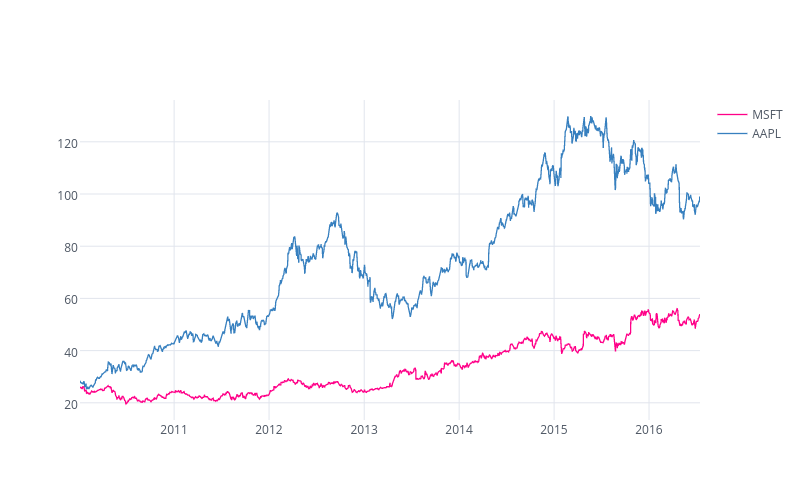

In [21]:
df[['MSFT', 'AAPL']].iplot(filename='fin_time_series_14', theme='white', 
                          colors=['pink','blue'], asImage=True, 
                          dimensions=(800, 500), world_readable=True)

### Advanced Use

It is also possible to get the Plotly Figure as an output to tweak it manually. We can achieve this with `asFigure=True`.

In [22]:
df['MSFT'].iplot(asFigure=True)

{'data': [{'line': {'color': 'rgba(255, 153, 51, 1.0)',
    'dash': 'solid',
    'width': 1.3},
   'mode': 'lines',
   'name': 'MSFT',
   'text': '',
   'type': 'scatter',
   'x': ['2010-01-04',
    '2010-01-05',
    '2010-01-06',
    '2010-01-07',
    '2010-01-08',
    '2010-01-11',
    '2010-01-12',
    '2010-01-13',
    '2010-01-14',
    '2010-01-15',
    '2010-01-19',
    '2010-01-20',
    '2010-01-21',
    '2010-01-22',
    '2010-01-25',
    '2010-01-26',
    '2010-01-27',
    '2010-01-28',
    '2010-01-29',
    '2010-02-01',
    '2010-02-02',
    '2010-02-03',
    '2010-02-04',
    '2010-02-05',
    '2010-02-08',
    '2010-02-09',
    '2010-02-10',
    '2010-02-11',
    '2010-02-12',
    '2010-02-16',
    '2010-02-17',
    '2010-02-18',
    '2010-02-19',
    '2010-02-22',
    '2010-02-23',
    '2010-02-24',
    '2010-02-25',
    '2010-02-26',
    '2010-03-01',
    '2010-03-02',
    '2010-03-03',
    '2010-03-04',
    '2010-03-05',
    '2010-03-08',
    '2010-03-09',
    '2010-03-

We can also get the **Data** object directly

In [23]:
data = df.to_iplot()

In [24]:
data[0]['name']='My Custom Name'

And pass this directly to **iplot**

In [25]:
df.iplot(data=data, filename='fin_time_series_15', world_readable=True)

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@pqp.io">team@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**datapark.io** |
<a href="http://datapark.io">http://datapark.io</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>